## Update all the library before train model

In [1]:
import numpy as np
import xgboost as xgb
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
import joblib

print("NumPy version:", np.__version__)
print("XGBoost version:", xgb.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Optuna version:", optuna.__version__)
print('joblib: ',joblib.__version__)


NumPy version: 2.1.3
XGBoost version: 2.1.2
scikit-learn version: 1.5.2
Pandas version: 2.2.3
Seaborn version: 0.13.2
Optuna version: 4.1.0
joblib:  1.4.2


/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '{: .2f}'.format(x))

In [3]:
df_bureau = pd.read_csv('dataset/bureau_data.csv')
df_customers = pd.read_csv('dataset//customers.csv')
df_loan = pd.read_csv('dataset/loans.csv')

In [4]:
df_customers.shape, df_bureau.shape, df_loan.shape

((50000, 12), (50000, 8), (50000, 15))

In [5]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [6]:
df_loan.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [7]:
df = pd.merge(df_customers,df_loan, on='cust_id')

In [8]:
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [9]:
df=pd.merge(df, df_bureau)

In [10]:
df.shape

(50000, 33)

In [11]:
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [12]:
df.default=df.default.astype('int64')

In [13]:
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58


In [14]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='default'), df.default, random_state=42, test_size=.25)

In [16]:
df_train=pd.concat([x_train,y_train],axis='columns')
df_test=pd.concat([x_test,y_test], axis='columns')

In [17]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [18]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [19]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [20]:
df_train.residence_type.fillna(df.residence_type.mode()[0],inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/166286498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(df.residence_type.mode()[0],inplace=True)


In [21]:
df_test.residence_type.unique()
df_test.residence_type.fillna(df.residence_type.mode()[0],inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/4190192640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(df.residence_type.mode()[0],inplace=True)


In [22]:
df_test.residence_type.unique()

array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [23]:
df_train.duplicated().sum()

np.int64(0)

In [24]:
columns_categorical = df_train.select_dtypes('object').columns
columns_num = df_train.select_dtypes(['float64','int64']).columns

In [25]:
columns_categorical, columns_num

(Index(['cust_id', 'gender', 'marital_status', 'employment_status',
        'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
        'loan_type', 'disbursal_date', 'installment_start_dt'],
       dtype='object'),
 Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
        'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
        'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
        'bank_balance_at_application', 'number_of_open_accounts',
        'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
        'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
       dtype='object'))

### Box plot to visualize outliers

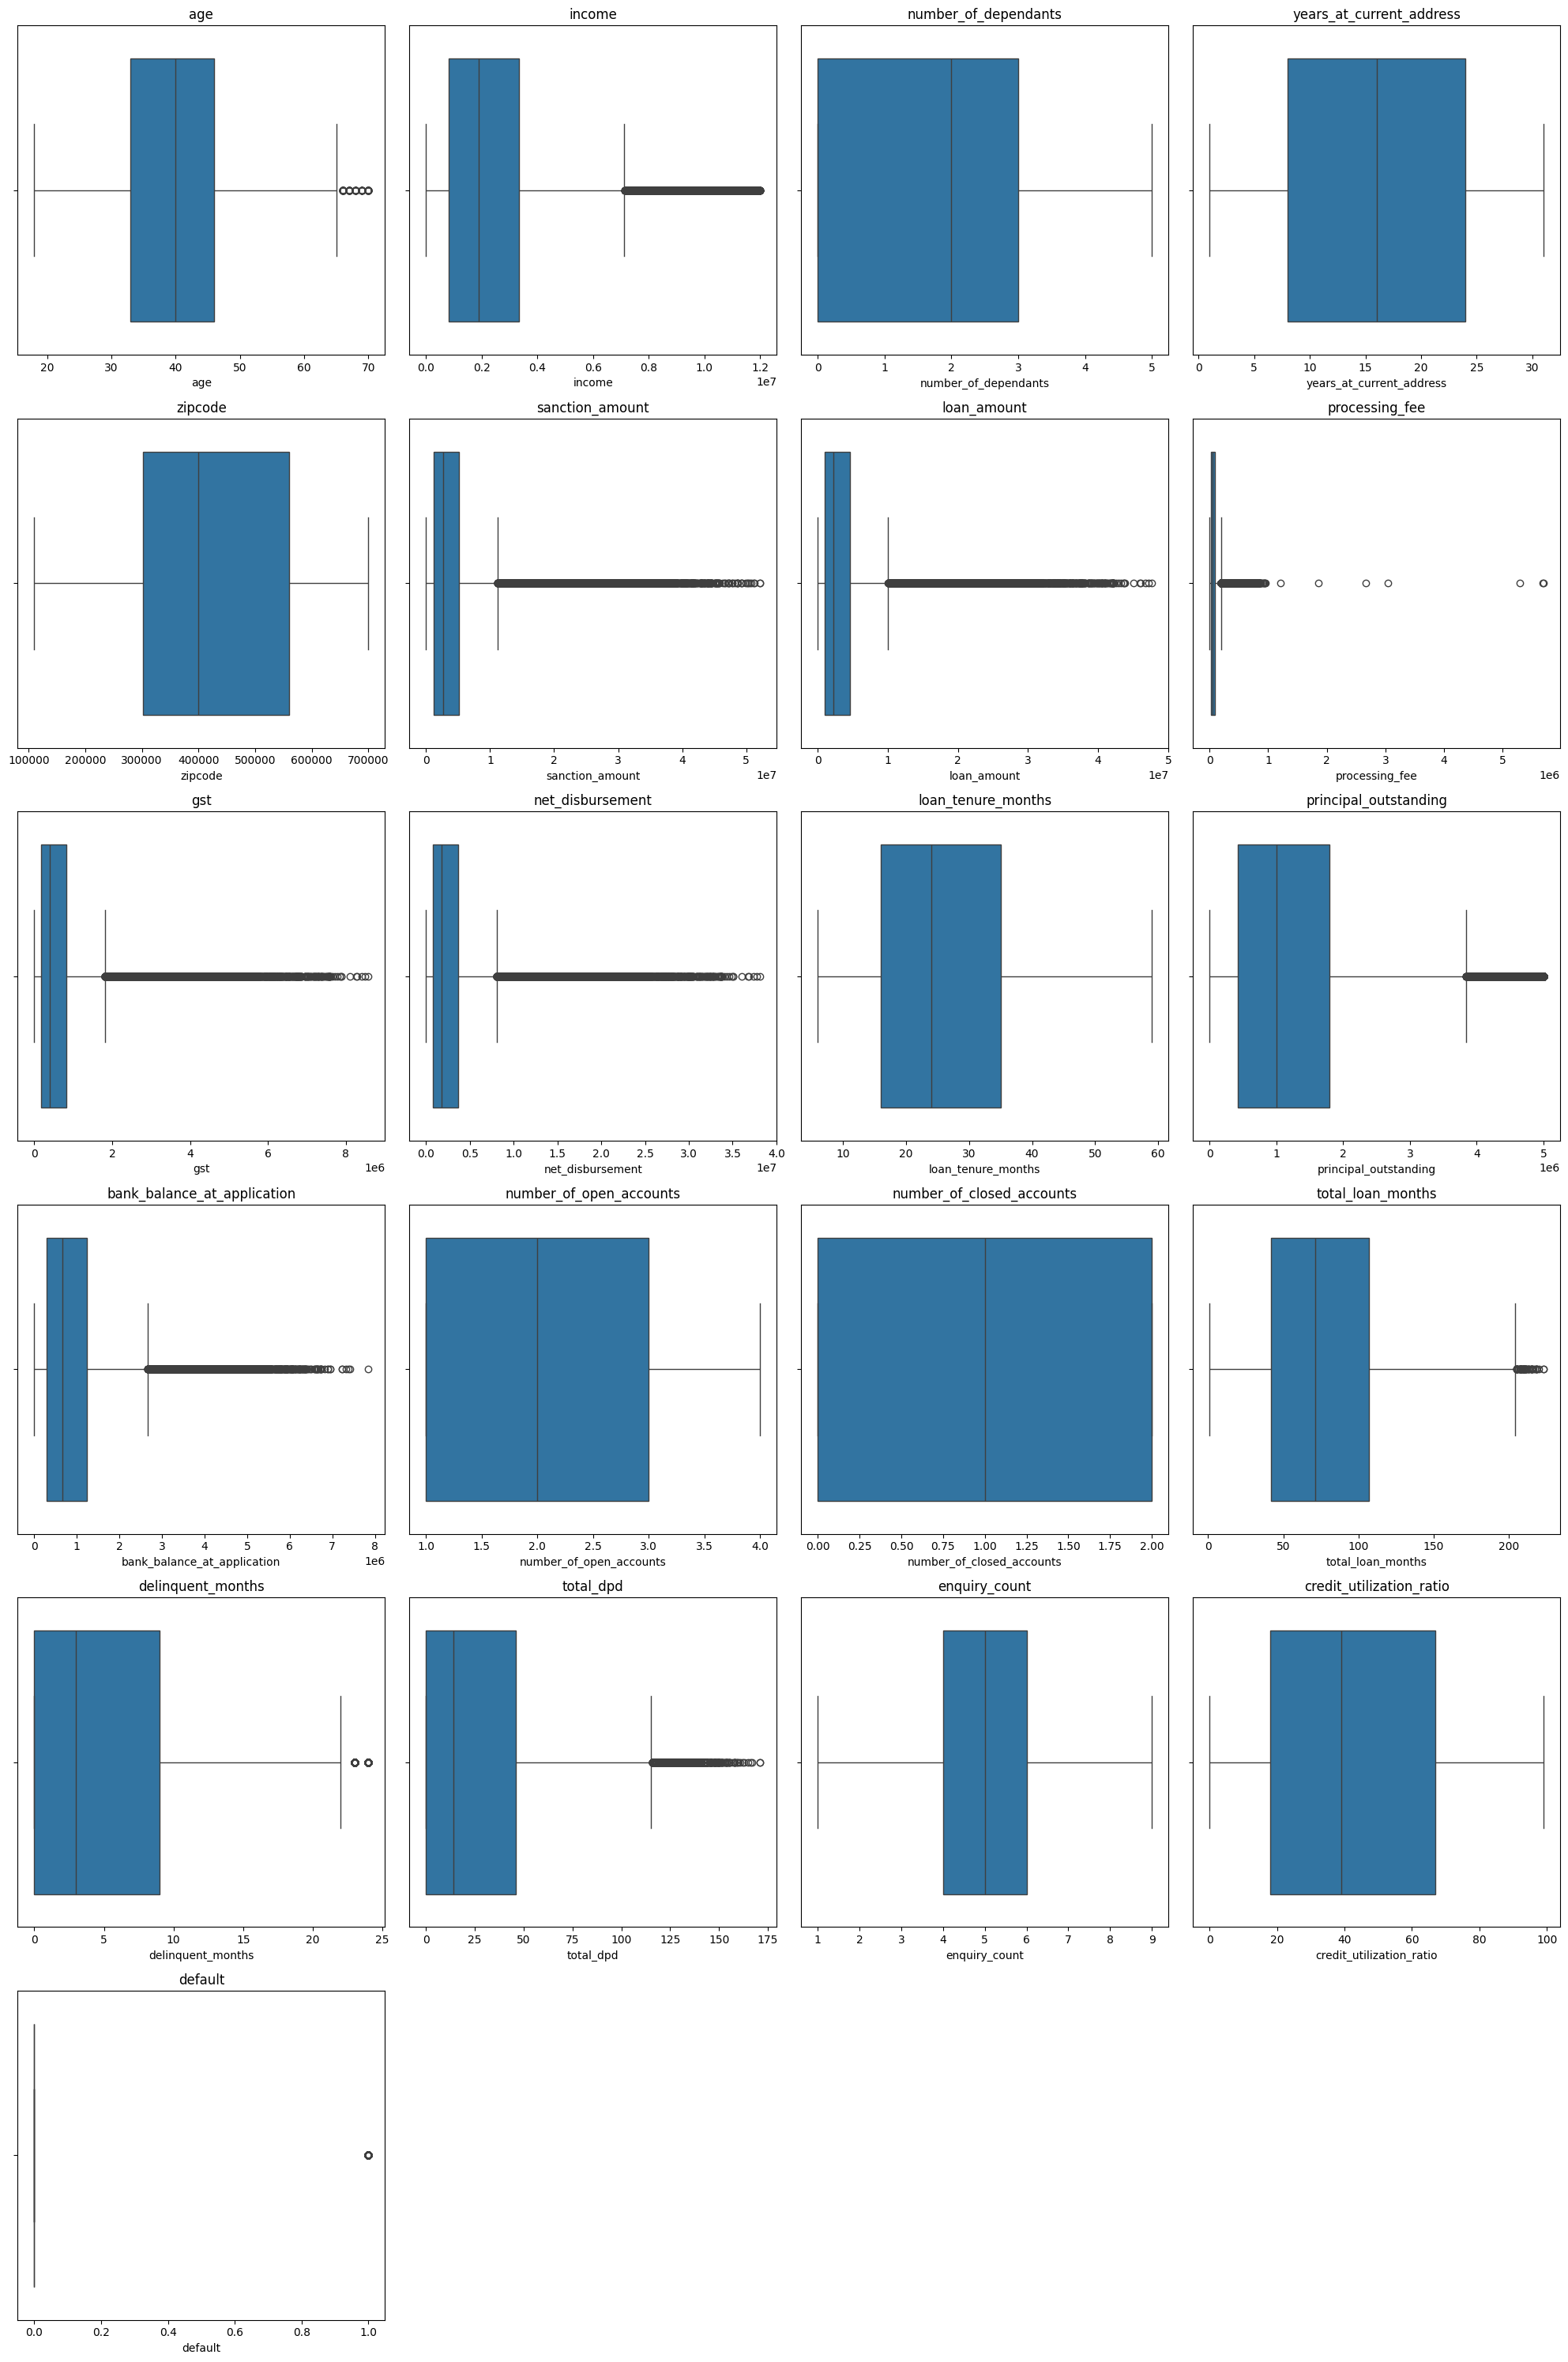

In [26]:
columns_num = df_train.select_dtypes(include=['number']).columns.tolist()

num_plots = len(columns_num)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_num):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Histplot Visualization

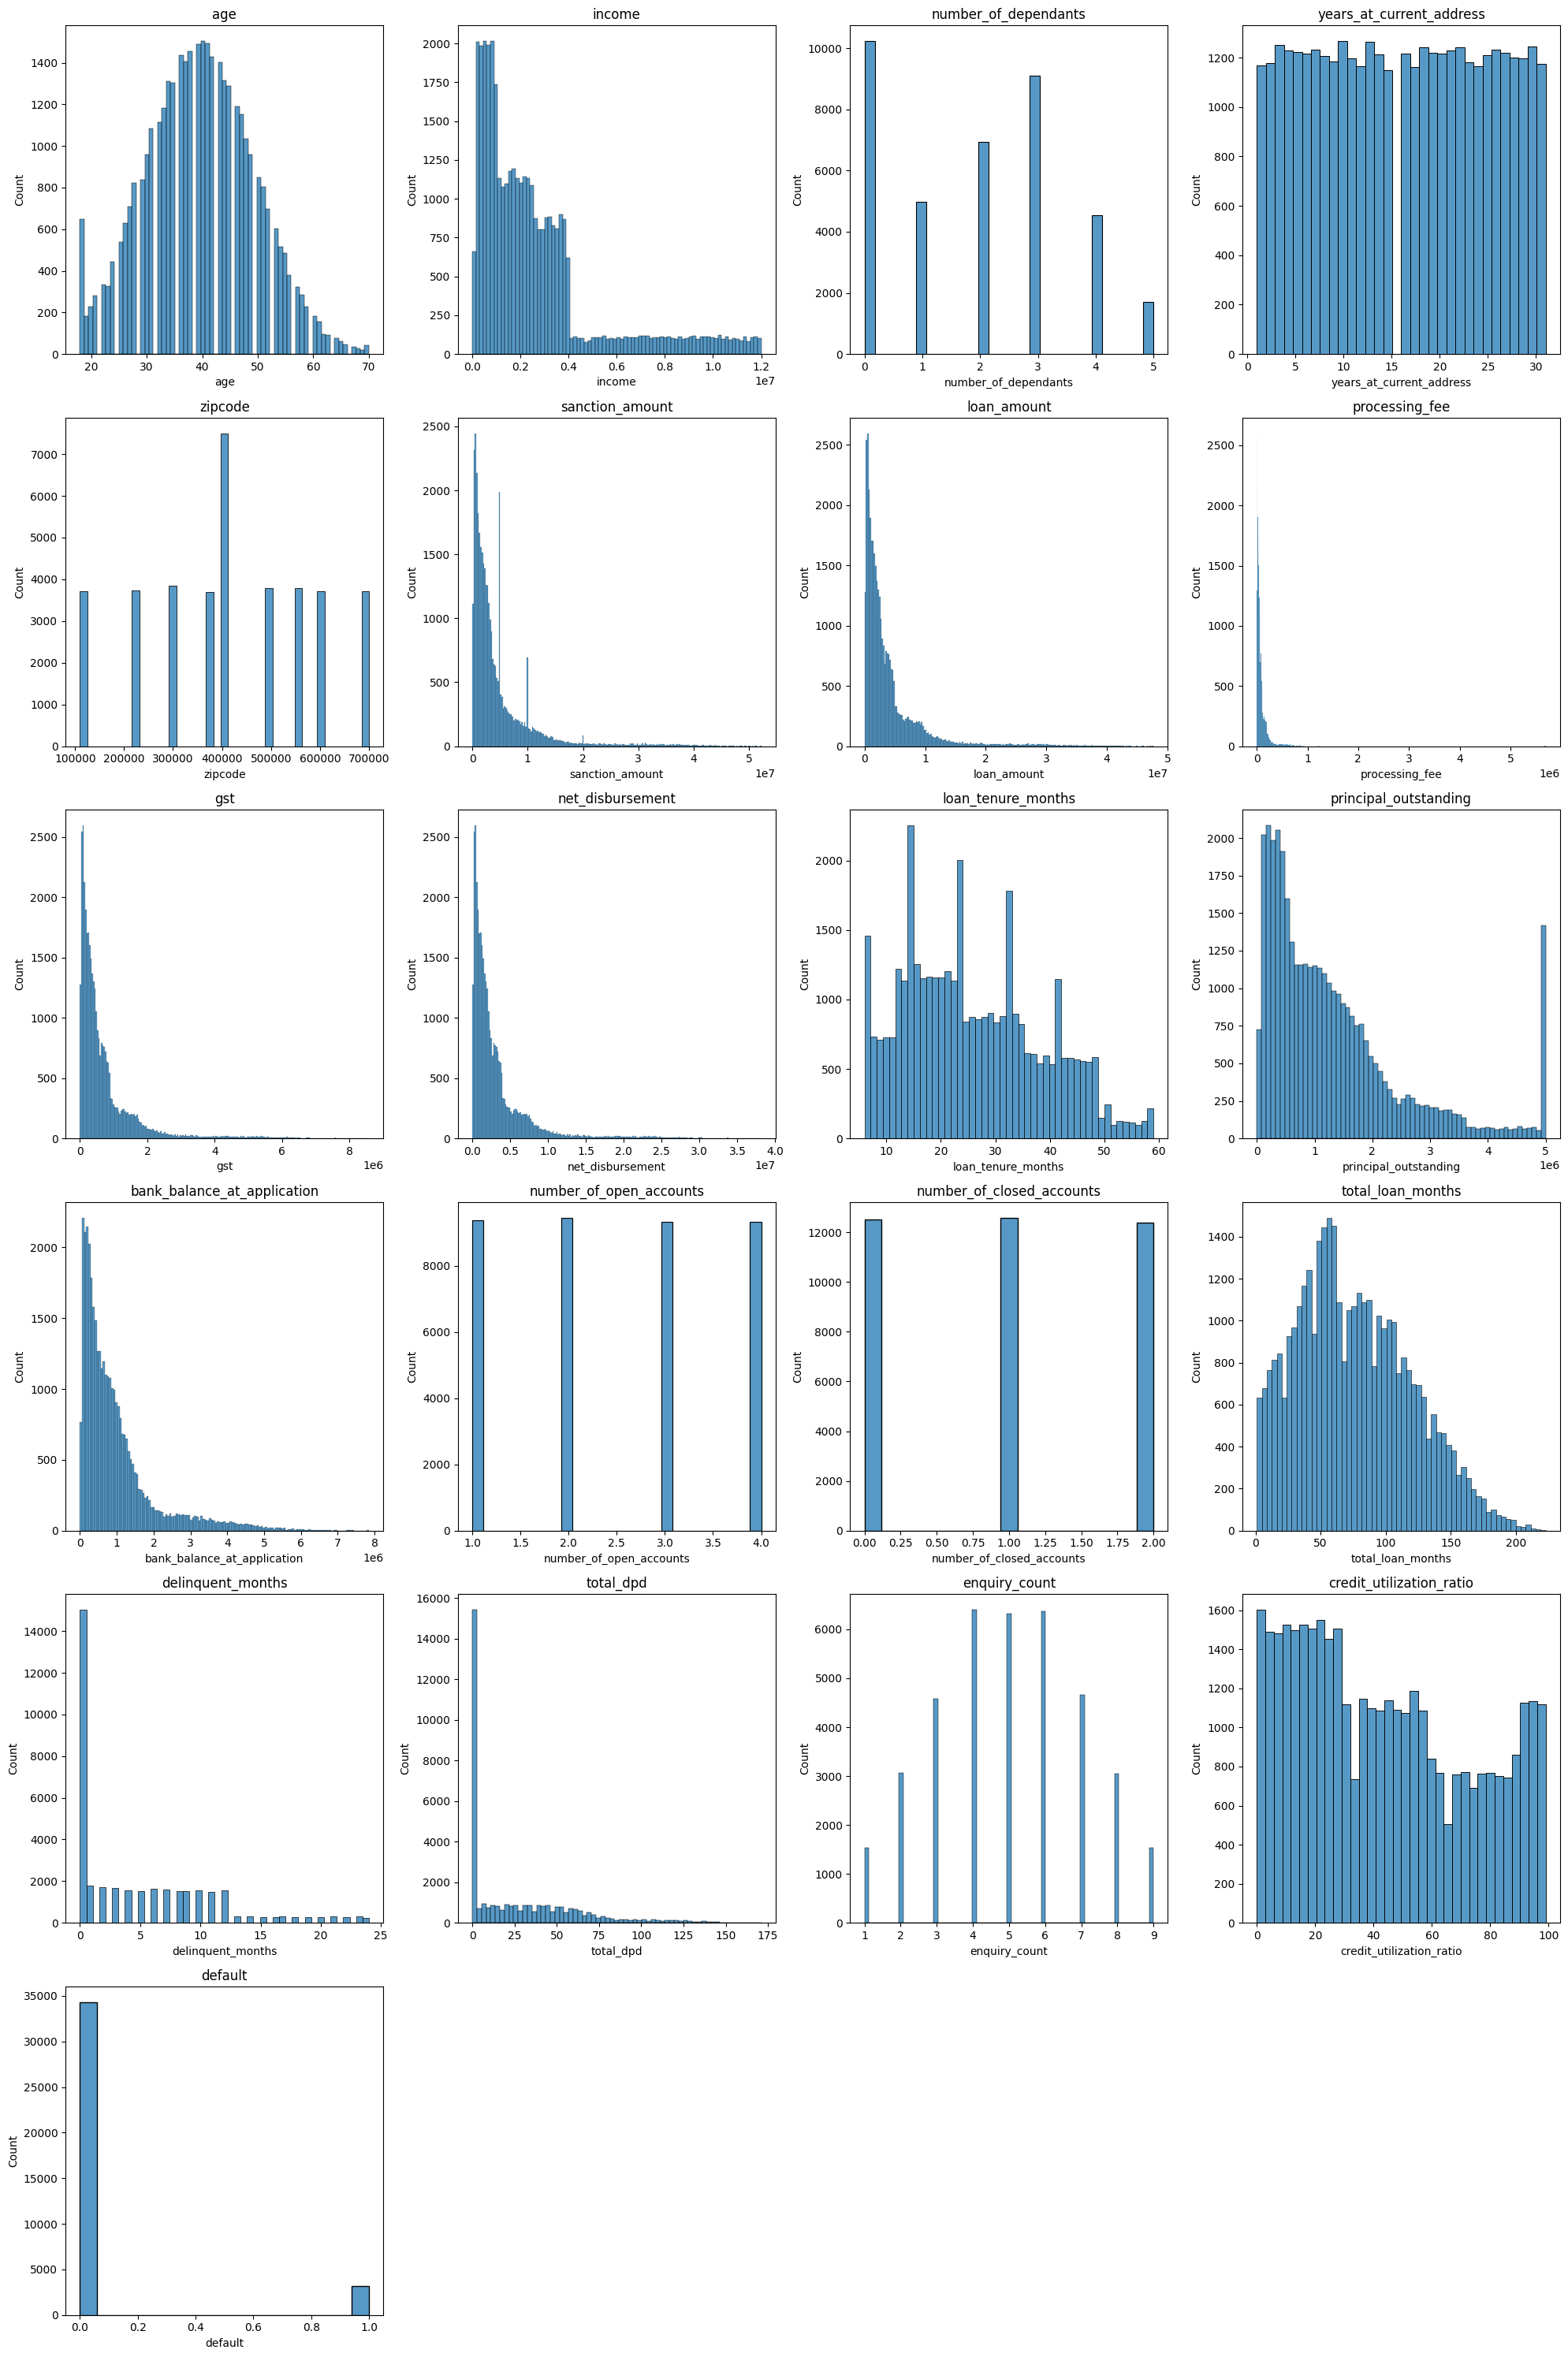

In [27]:
columns_num = df_train.select_dtypes(include=['number']).columns.tolist()

num_plots = len(columns_num)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_num):
    sns.histplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [28]:
df_train.processing_fee.describe()

count      37500.00
mean       80724.11
std       120830.65
min            0.00
25%        19180.00
50%        44700.00
75%        92000.00
max      5698029.90
Name: processing_fee, dtype: float64

In [29]:
# Displaying the summary statistics with a more readable format
df_train.processing_fee.describe().apply(lambda x: f"{x:,.2f}")


count       37,500.00
mean        80,724.11
std        120,830.65
min              0.00
25%         19,180.00
50%         44,700.00
75%         92,000.00
max      5,698,029.90
Name: processing_fee, dtype: object

In [30]:
df_train[df_train.processing_fee>(.03*df_train.loan_amount)][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [31]:
df_train = df_train[df_train.processing_fee<(.03*df_train.loan_amount)].copy()

In [32]:
df_train[df_train.processing_fee>(.03*df_train.loan_amount)][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [33]:
df_test = df_test[df_test.processing_fee<(.03*df_test.loan_amount)].copy()

In [34]:
col_categorical = df_train.select_dtypes('object').columns

In [35]:
for col in col_categorical:
    print(col,": ",df_train[col].unique())

cust_id :  ['C27435' 'C13401' 'C00884' ... 'C38159' 'C00861' 'C15796']
gender :  ['F' 'M']
marital_status :  ['Single' 'Married']
employment_status :  ['Salaried' 'Self-Employed']
residence_type :  ['Owned' 'Mortgage' 'Rented']
city :  ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state :  ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_id :  ['L27435' 'L13401' 'L00884' ... 'L38159' 'L00861' 'L15796']
loan_purpose :  ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type :  ['Secured' 'Unsecured']
disbursal_date :  ['2022-04-21' '2020-11-24' '2019-08-25' ... '2024-04-06' '2021-11-30'
 '2021-11-24']
installment_start_dt :  ['2022-05-21' '2020-12-11' '2019-09-19' ... '2024-08-16' '2019-07-27'
 '2022-12-02']


In [36]:
df_train.loan_purpose.replace('Personaal','Personal',inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/2769298601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.loan_purpose.replace('Personaal','Personal',inplace=True)


In [37]:
df_train.loan_purpose.unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [38]:
df_test.loan_purpose.replace('Personaal','Personal',inplace=True)

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/2052121290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.loan_purpose.replace('Personaal','Personal',inplace=True)


In [39]:
df_test.loan_purpose.unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

from IPython.display import HTML

HTML("<h3 style='text-align: center; color: blue;'>Exploratory Data</h3>")


In [40]:
df_train.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0


In [41]:
col_numeric=df_train.select_dtypes(['float64', 'int64']).columns
col_numeric

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

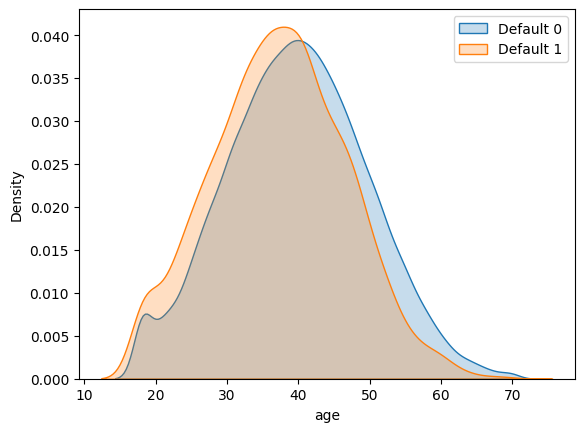

In [42]:
sns.kdeplot(df_train[df_train.default==0]['age'], fill=True, label='Default 0')
sns.kdeplot(df_train[df_train.default==1]['age'], fill=True, label='Default 1')
plt.legend()
plt.show()

### KDE for all the columns

 insights
1.orange graph shifted little bit right, means younger people more likely to be default

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/2753136217.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train.default==0][col], fill=True, label='Default 0')
/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/2753136217.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train.default==1][col], fill=True, label='Default 1')


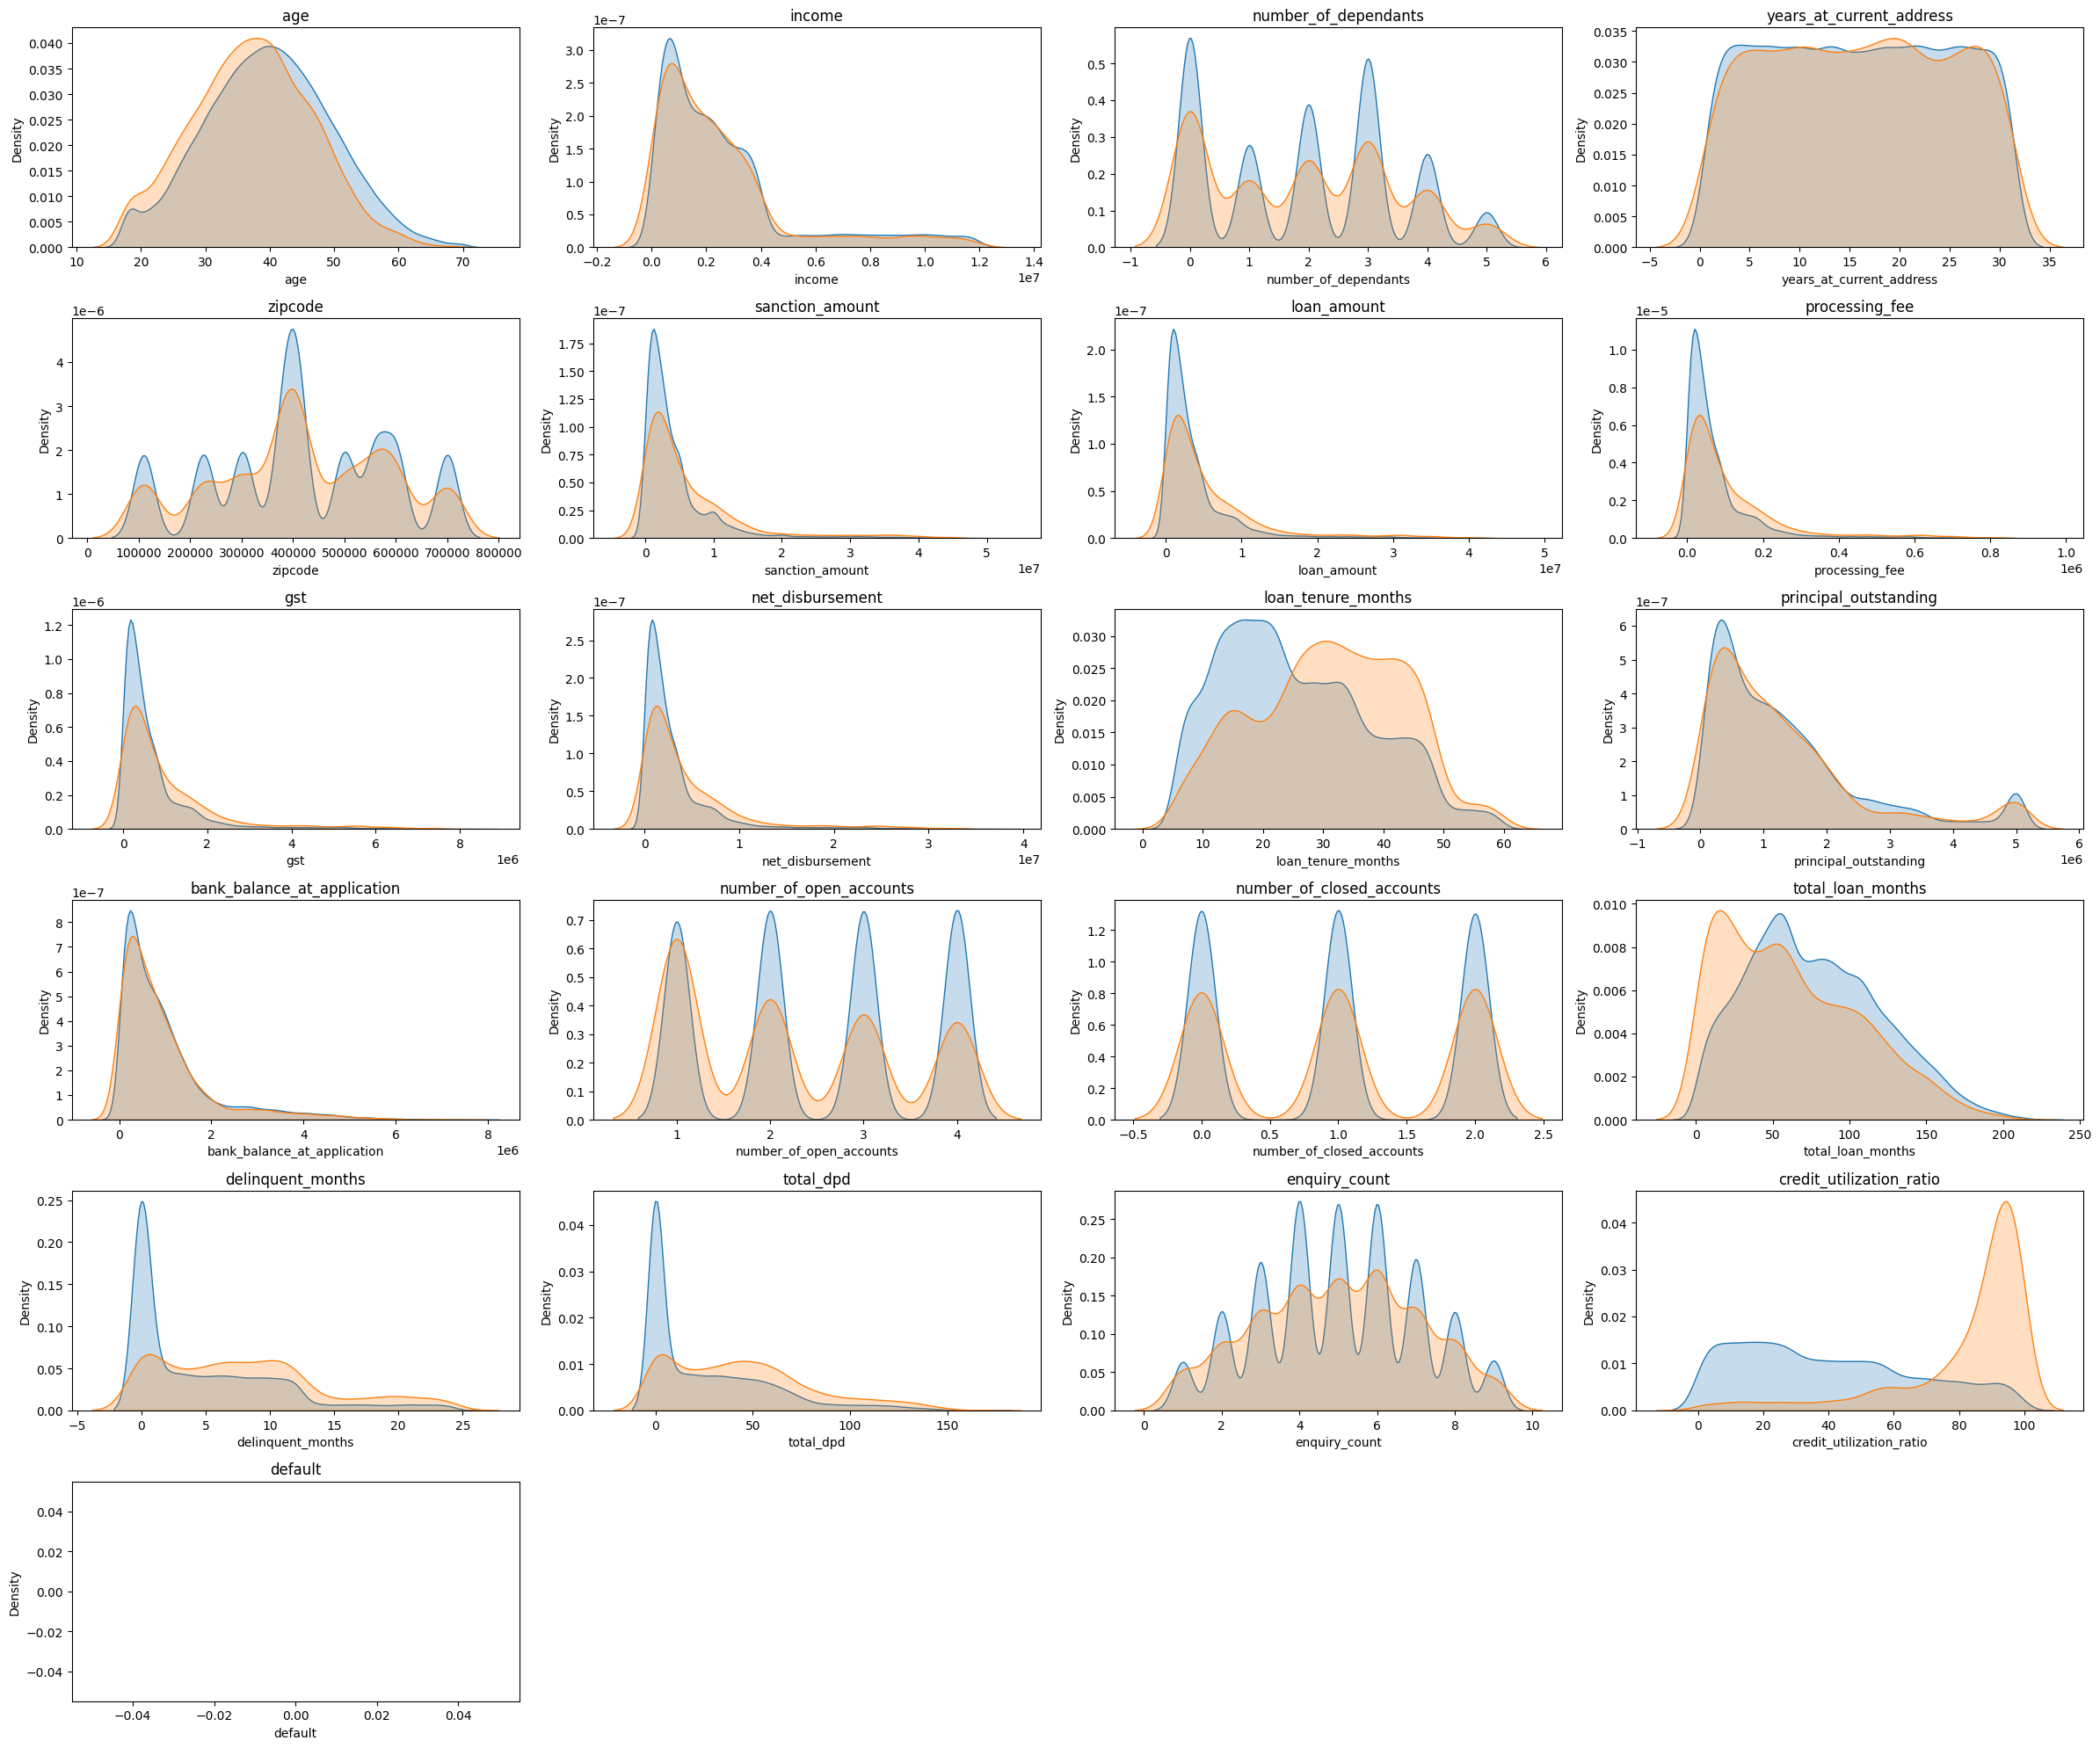

In [43]:
plt.figure(figsize=(24,20))
for i, col in enumerate(col_numeric):
    plt.subplot(6,4,i+1) #i row, 4 columns
    sns.kdeplot(df_train[df_train.default==0][col], fill=True, label='Default 0')
    sns.kdeplot(df_train[df_train.default==1][col], fill=True, label='Default 1')
    plt.title(col)
plt.tight_layout()
plt.show()

### Insights

In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
In remaining columns the distributions do not give any obvious insights
Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later'''

insights


In [44]:
from IPython.display import HTML

HTML("<h3 style='text-align: center; color: blue;'>Feature Engineering</h3>")


In [45]:
df_train['loan_to_income'] = round(df_train['loan_amount']/df_train['income'],2)
df_train['loan_to_income'].describe()


count    37487.00
mean         1.55
std          0.97
min          0.30
25%          0.77
50%          1.16
75%          2.45
max          4.57
Name: loan_to_income, dtype: float64

In [46]:
df_train['loan_to_income'].head(4)

27434    2.90
13400    1.08
883      0.66
7303     1.10
Name: loan_to_income, dtype: float64

In [47]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'],2)
df_test['loan_to_income'].head(4)

33553    1.40
9427     3.24
199      3.01
12447    1.10
Name: loan_to_income, dtype: float64

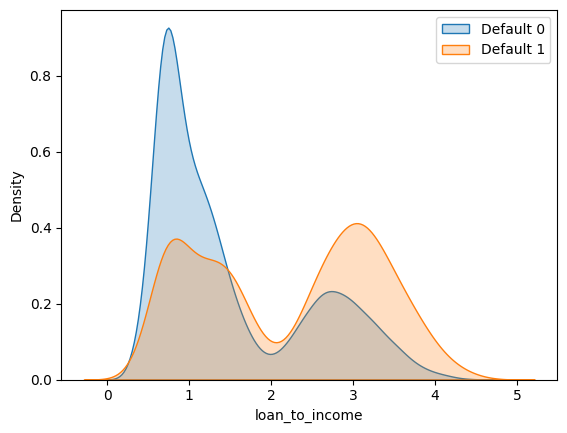

In [48]:
sns.kdeplot(df_train[df_train.default==0]['loan_to_income'], fill=True, label='Default 0')
sns.kdeplot(df_train[df_train.default==1]['loan_to_income'], fill=True, label='Default 1')
plt.legend()
plt.show()

In [49]:
df_train[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [50]:
df_train['delinquency_ratio']=(df_train['delinquent_months']*100/df_train['total_loan_months']).round(1)
df_test['delinquency_ratio']=(df_test['delinquent_months']*100/df_test['total_loan_months']).round(1)

In [51]:
df_train[['delinquent_months','total_loan_months','delinquency_ratio']]

,delinquent_months,total_loan_months,delinquency_ratio
27434,6,90,6.70
13400,4,119,3.40
883,14,83,16.90
7303,0,37,0.00
45124,6,62,9.70
...,...,...,...
11284,23,129,17.80
44732,0,80,0.00
38158,0,8,0.00
860,5,130,3.80


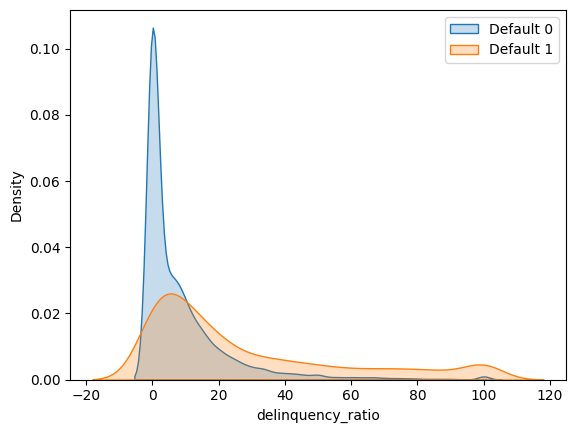

In [52]:
sns.kdeplot(df_train[df_train.default==0]['delinquency_ratio'], fill=True, label='Default 0')
sns.kdeplot(df_train[df_train.default==1]['delinquency_ratio'], fill=True, label='Default 1')
plt.legend()
plt.show()

In [53]:
df_train['avg_dpd_per_delinquency']=np.where(
    df_train.delinquent_months !=0,
    (df_train.total_dpd/df_train.delinquent_months).round(1),
    0)

df_train['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [54]:
df_test['avg_dpd_per_delinquency']=np.where(
    df_test.delinquent_months !=0,
    (df_test.total_dpd/df_test.delinquent_months).round(1),
    0)

df_test['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [55]:
df_train['avg_dpd_per_delinquency'].describe()

count    37487.00
mean         3.29
std          2.90
min          0.00
25%          0.00
50%          4.30
75%          5.80
max         10.00
Name: avg_dpd_per_delinquency, dtype: float64

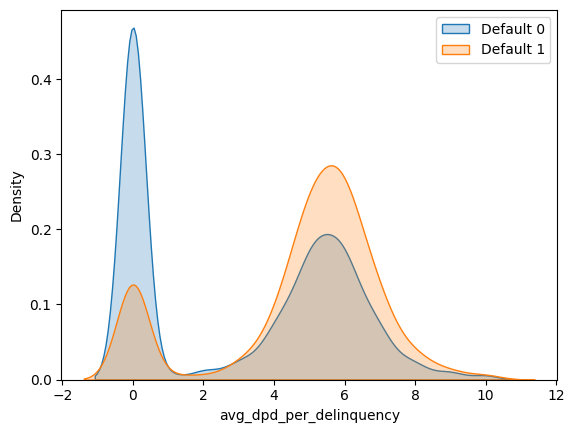

In [56]:
sns.kdeplot(df_train[df_train.default==0]['avg_dpd_per_delinquency'], fill=True, label='Default 0')
sns.kdeplot(df_train[df_train.default==1]['avg_dpd_per_delinquency'], fill=True, label='Default 1')
plt.legend()
plt.show()

In [57]:
from IPython.display import HTML

HTML("<h3 style='text-align: center; color: blue;'>Feature Selection</h3>")


In [58]:
df_train.shape, df_test.shape

((37487, 36), (12498, 36))

In [59]:
df_train.shape, y_train.shape

((37487, 36), (37500,))

In [60]:
df_train.head(1)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2,90,6,33,8,59,0,2.90,6.70,5.50


In [61]:
# drop feature based on technicla understanding

df_train1 = df_train.drop(['loan_id', 'cust_id'], axis='columns')
df_test1 = df_test.drop(['loan_id', 'cust_id'], axis='columns')

df_train1.shape, df_test1.shape

((37487, 34), (12498, 34))

In [62]:
# drop features based on business understanding

df_train2 = df_train1.drop(['disbursal_date','installment_start_dt','loan_amount','income','total_loan_months',
                       'delinquent_months','total_dpd'], axis='columns')
df_test2 = df_test1.drop(['disbursal_date','installment_start_dt','loan_amount','income','total_loan_months',
                       'delinquent_months','total_dpd'], axis='columns')

In [63]:
df_train2.shape, df_test2.shape

((37487, 27), (12498, 27))

In [64]:
df_train2.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [65]:
x_train=df_train2.drop('default', axis='columns')

y_train=df_train2.default
from sklearn.preprocessing import MinMaxScaler

col_to_scale = x_train.select_dtypes(['int64','float64']).columns
sc=MinMaxScaler()
x_train[col_to_scale]=sc.fit_transform(x_train[col_to_scale])

In [66]:
x_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [67]:
x_test=df_test2.drop('default', axis='columns')
y_test=df_test2.default
from sklearn.preprocessing import MinMaxScaler

col_to_scale = x_test.select_dtypes(['int64','float64']).columns
sc=MinMaxScaler()
x_test[col_to_scale]=sc.fit_transform(x_test[col_to_scale])

In [68]:
x_test.head(3)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
33553,0.35,F,Married,Self-Employed,0.60,Owned,0.47,Hyderabad,Telangana,0.66,...,0.53,0.30,0.26,0.33,1.00,0.50,0.12,0.26,0.04,0.90
9427,0.29,F,Single,Salaried,0.00,Owned,0.47,Jaipur,Rajasthan,0.33,...,0.62,0.27,0.11,1.00,0.00,1.00,0.86,0.69,0.00,0.00
199,0.19,M,Single,Self-Employed,0.00,Owned,0.60,Delhi,Delhi,0.00,...,0.62,0.10,0.05,1.00,0.50,0.38,0.73,0.63,0.00,0.00


### Confusion Matrix to visualize the correlation

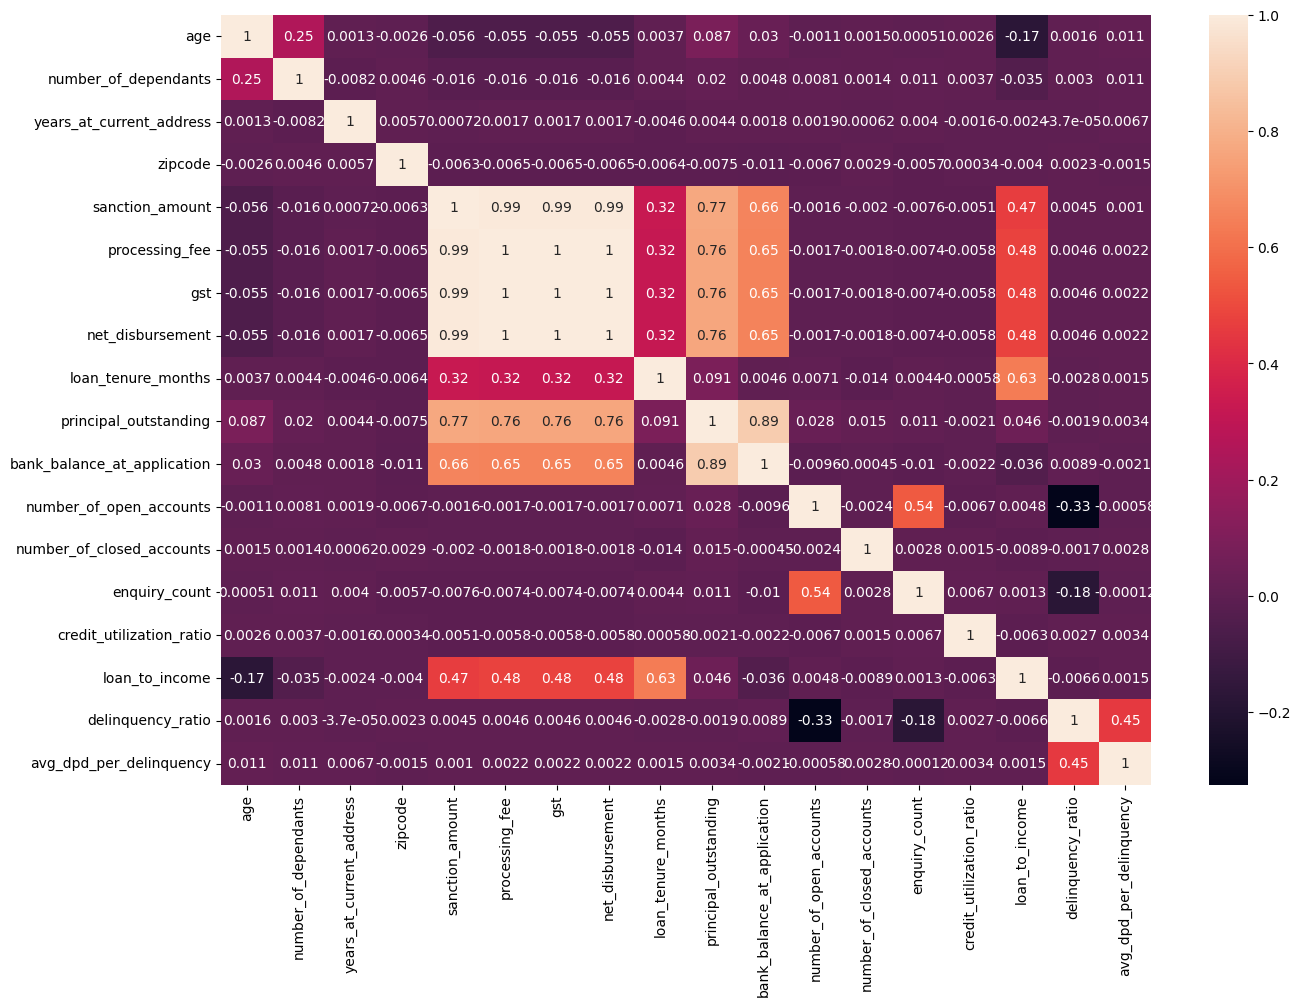

In [69]:
plt.figure(figsize=(15,10))
cm=x_train[col_to_scale].corr()
sns.heatmap(cm,annot=True)
plt.show()

### ### VIF to avoid Multicollinearity

In [70]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['variable']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [71]:
calculate_vif(x_train[col_to_scale])

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


### Drop feature based on VIF

In [72]:
 

features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']

x_train1 = x_train.drop(features_to_drop_vif, axis='columns')
x_test1 = x_test.drop(features_to_drop_vif, axis='columns')

In [73]:
num_col=x_train1.select_dtypes(['float64', 'int64']).columns
num_col

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [74]:
vif_df = calculate_vif(x_train1[num_col])
vif_df

,variable,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [75]:
selected_num_features_vif = vif_df.variable.values

In [76]:
selected_num_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [77]:
y_train.head(10)

27434    0
13400    0
883      0
7303     0
45124    0
874      0
45943    0
11458    0
23877    1
11       0
Name: default, dtype: int64

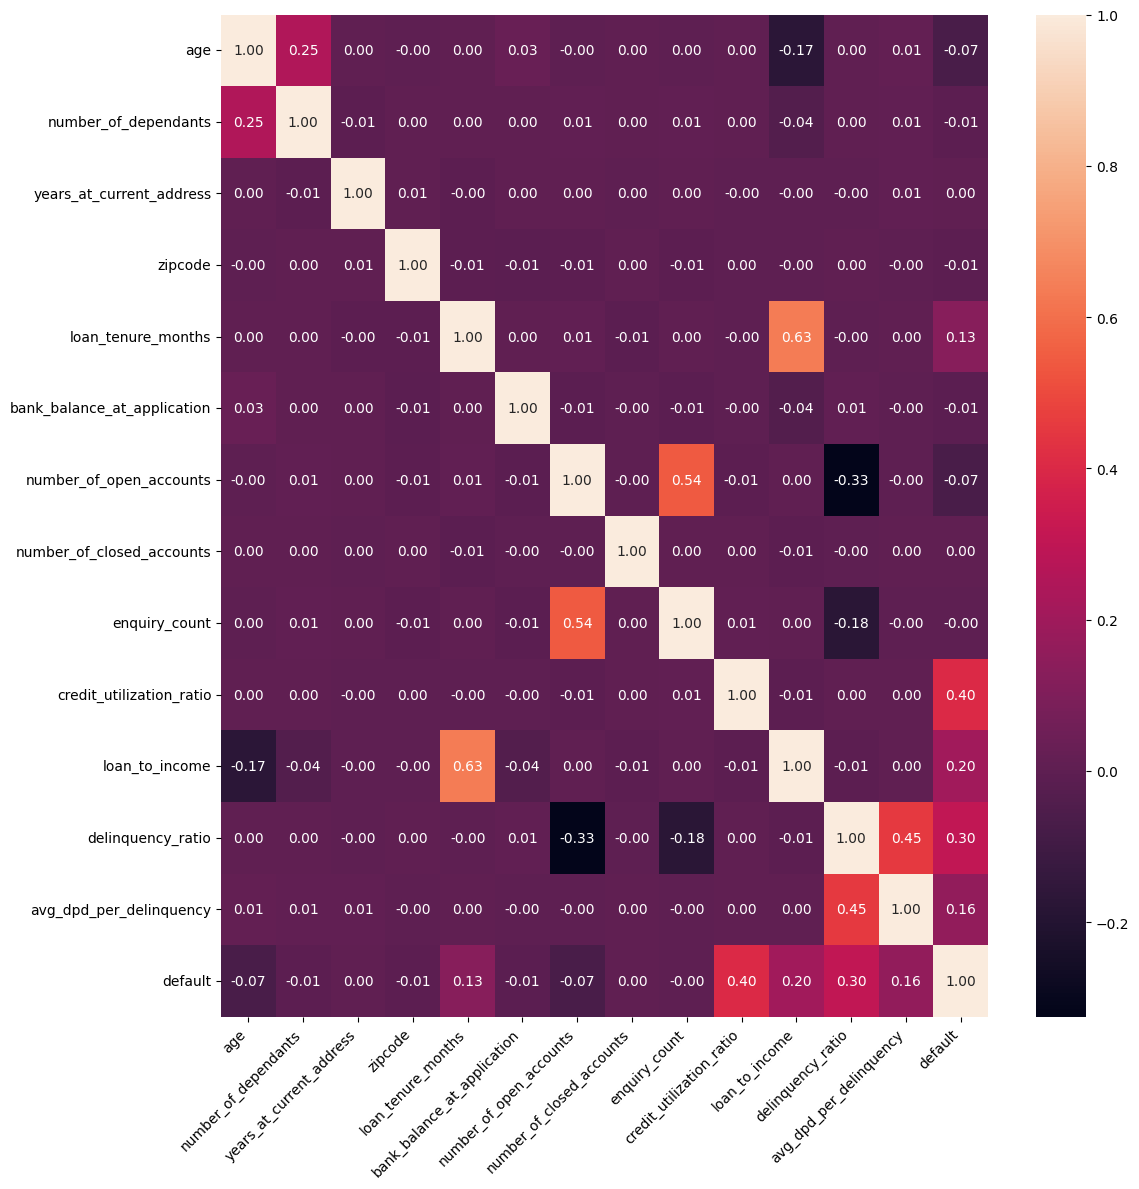

In [78]:
plt.figure(figsize=(12,12))
cm=pd.concat([x_train1[selected_num_features_vif], y_train], axis=1).corr()
sns.heatmap(cm,annot=True,fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Selection : Categorical Features

In [79]:
x_train1.select_dtypes("object").columns

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type'],
      dtype='object')

In [80]:
temp = pd.concat([x_train1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


### Calculate WOE and IV

In [81]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count':'total', 'sum':'good'})
    grouped['bad'] = grouped['total']-grouped['good']

    total_good=grouped['good'].sum()
    total_bad=grouped['bad'].sum()
    grouped['good_pct'] = grouped['good']/total_good
    grouped['bad_pct'] = grouped['bad']/total_bad
    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = grouped['woe'] * (grouped['good_pct']-grouped['bad_pct'])

    grouped['woe'] = grouped['woe'].replace([np.inf - np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf - np.inf], 0)

    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([x_train1, y_train], axis=1), 'loan_purpose', 'default')


In [82]:
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [83]:
total_iv

np.float64(0.39377543144164784)

In [84]:
x_train1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [85]:
pd.cut(x_train1['loan_to_income'], bins=20)

27434    (0.6, 0.65]
13400    (0.15, 0.2]
883      (0.05, 0.1]
7303     (0.15, 0.2]
45124    (0.35, 0.4]
            ...     
11284    (0.2, 0.25]
44732    (0.2, 0.25]
38158    (0.55, 0.6]
860      (0.25, 0.3]
15795    (0.1, 0.15]
Name: loan_to_income, Length: 37487, dtype: category
Categories (20, interval[float64, right]): [(-0.001, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.2] ... (0.8, 0.85] < (0.85, 0.9] < (0.9, 0.95] < (0.95, 1.0]]

In [86]:

iv_values = {}

for feature in x_train1.columns:
    
    if x_train1[feature].dtype== 'object':
        _, iv = calculate_woe_iv(pd.concat([x_train1, y_train], axis=1), feature, 'default')
        
    else:
        x_binned = pd.cut(x_train1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([x_binned, y_train], axis=1), feature, 'default')

    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4915664

In [87]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df1 = iv_df.sort_values(by='IV', ascending=False)
iv_df1

,Feature,IV
17,credit_utilization_ratio,2.42
19,delinquency_ratio,0.68
18,loan_to_income,0.49
20,avg_dpd_per_delinquency,0.42
10,loan_purpose,0.39
5,residence_type,0.26
12,loan_tenure_months,0.23
11,loan_type,0.17
0,age,0.08
14,number_of_open_accounts,0.07


### Features Selection list after IV

In [88]:
iv_df[iv_df1['IV']>.02]

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/2772287562.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  iv_df[iv_df1['IV']>.02]


,Feature,IV
0,age,0.08
5,residence_type,0.26
10,loan_purpose,0.39
11,loan_type,0.17
12,loan_tenure_months,0.23
14,number_of_open_accounts,0.07
17,credit_utilization_ratio,2.42
18,loan_to_income,0.49
19,delinquency_ratio,0.68
20,avg_dpd_per_delinquency,0.42


In [89]:
selected_features_iv = iv_df[iv_df1['IV']>.02]['Feature'].values

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/871015715.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_features_iv = iv_df[iv_df1['IV']>.02]['Feature'].values


In [90]:
x_train_reduced = x_train1[selected_features_iv]
x_test_reduced = x_test1[selected_features_iv]

### Feature Encoding

In [91]:
x_train_encoded = pd.get_dummies(x_train_reduced, drop_first=True)
x_test_encoded = pd.get_dummies(x_test_reduced, drop_first=True)

In [92]:
x_train_encoded.shape, x_test_encoded.shape

((37487, 13), (12498, 13))

In [93]:
x_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.52,0.34,1.00,0.60,0.61,0.07,0.55,True,False,False,True,False,False
13400,0.21,0.51,0.67,0.93,0.18,0.03,0.42,True,False,False,False,False,False
883,0.62,0.25,0.33,0.84,0.08,0.17,0.56,False,False,False,False,True,True


In [94]:
print("x_train_encoded shape:", x_train_encoded.shape)
print("y_train shape:", y_train.shape)

x_train_encoded shape: (37487, 13)
y_train shape: (37487,)


# Model Training

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


model = LogisticRegression()
model.fit(x_train_encoded, y_train)

y_pred = model.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_encoded, y_train)

y_pred = model.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



### Xgboost

In [97]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train_encoded, y_train)

y_pred = model.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.72      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.88     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [98]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [99]:
x_train_rus.shape, y_train_rus.shape

((6378, 13), (6378,))

In [100]:
model = LogisticRegression()
model.fit(x_train_rus, y_train_rus)

y_pred = model.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [101]:
model = RandomForestClassifier()
model.fit(x_train_rus, y_train_rus)

y_pred = model.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.54      0.97      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.77      0.95      0.83     12498
weighted avg       0.96      0.92      0.93     12498



### Attempt 3
1. Logistic Regression
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter Tuning Using Optuna


In [102]:
from imblearn.combine import SMOTETomek

rus = SMOTETomek(random_state=42)
x_train_smt, y_train_smt = rus.fit_resample(x_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [103]:
model = LogisticRegression()
model.fit(x_train_smt, y_train_smt)

y_pred = model.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



# Optuna

In [104]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [105]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, x_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2024-11-17 22:09:22,042] A new study created in memory with name: no-name-b6b1f8c5-09e8-4868-b3c3-562e27e233bb
[I 2024-11-17 22:09:23,163] Trial 0 finished with value: 0.943769571792188 and parameters: {'C': 84.19173848010934, 'solver': 'liblinear', 'tol': 0.0361803374040951, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.943769571792188.
[I 2024-11-17 22:09:23,741] Trial 1 finished with value: 0.8732675590097743 and parameters: {'C': 0.0009029814411764416, 'solver': 'liblinear', 'tol': 5.682591467801027e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.943769571792188.
[I 2024-11-17 22:09:24,344] Trial 2 finished with value: 0.9416341032113142 and parameters: {'C': 282.10070161719204, 'solver': 'newton-cg', 'tol': 0.003976109608427696, 'class_weight': None}. Best is trial 0 with value: 0.943769571792188.
[I 2024-11-17 22:09:24,441] Trial 3 finished with value: 0.9448479643584135 and parameters: {'C': 1614.959897854029, 'solver': 'lbfgs', 'tol': 0.000156437

In [106]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(x_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(x_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9449754418389849
  Params: 
    C: 9.808448460353018
    solver: liblinear
    tol: 0.026585979267202447
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [107]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, x_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2024-11-17 22:09:31,147] A new study created in memory with name: no-name-6f13a67a-75da-400d-a8ee-c04ff990547d
[I 2024-11-17 22:09:31,451] Trial 0 finished with value: 0.9655168542306859 and parameters: {'lambda': 0.2271475689495024, 'alpha': 5.239668019896647, 'subsample': 0.9907768207430119, 'colsample_bytree': 0.5764263519709657, 'max_depth': 6, 'eta': 0.2637061238723179, 'gamma': 5.576559575852837, 'scale_pos_weight': 3.857324578775277, 'min_child_weight': 2, 'max_delta_step': 5}. Best is trial 0 with value: 0.9655168542306859.
[I 2024-11-17 22:09:31,767] Trial 1 finished with value: 0.9591645260920115 and parameters: {'lambda': 0.00625934208939243, 'alpha': 0.0010441647155286628, 'subsample': 0.6375190189780566, 'colsample_bytree': 0.7627230545262987, 'max_depth': 5, 'eta': 0.12215545268430045, 'gamma': 5.832716124184576, 'scale_pos_weight': 3.9303555087964948, 'min_child_weight': 8, 'max_delta_step': 6}. Best is trial 0 with value: 0.9655168542306859.
[I 2024-11-17 22:09:32,01

In [108]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(x_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(x_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9733739472889473
  Params: 
    lambda: 0.07120082807486669
    alpha: 3.132087250466945
    subsample: 0.5585228446464244
    colsample_bytree: 0.7011390340518802
    max_depth: 10
    eta: 0.15808297335222576
    gamma: 0.684792849418896
    scale_pos_weight: 1.1080617949249505
    min_child_weight: 10
    max_delta_step: 6
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11390
           1       0.71      0.87      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.92      0.88     12498
weighted avg       0.96      0.96      0.96     12498



## Model Evaluation : ROC/AUC

In [109]:
y_prd = best_model_logistic.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11390
           1       0.71      0.87      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.92      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [110]:
from sklearn.metrics import roc_curve

probability = best_model_logistic.predict_proba(x_test_encoded)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
fpr[:10], tpr[:10], thresholds[:10]


(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.77963126e-05,
        8.77963126e-05, 1.75592625e-04, 1.75592625e-04, 2.63388938e-04,
        2.63388938e-04, 3.51185250e-04]),
 array([0.        , 0.00090253, 0.20577617, 0.20577617, 0.2400722 ,
        0.2400722 , 0.26624549, 0.26624549, 0.30054152, 0.30054152]),
 array([       inf, 0.99999973, 0.99789694, 0.99786327, 0.99698328,
        0.99694995, 0.99594916, 0.9959356 , 0.99485364, 0.99483681]))

In [111]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9830087986485072)

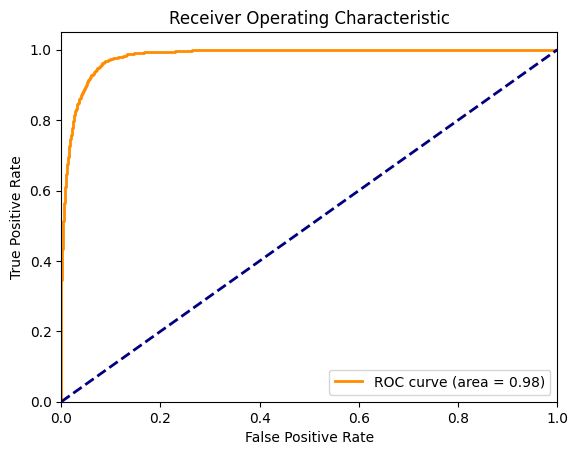

In [112]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Eavluation: Rankorder & KS Statistic

In [113]:
probabilities = best_model_logistic.predict_proba(x_test_encoded)[:,1]
probabilities

df_eval = pd.DataFrame({
    'Default Truth':y_test,
    'Default Probability': probabilities
})
df_eval.head(2)

,Default Truth,Default Probability
33553,0,0.00
9427,0,0.74


In [114]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.00,1
9427,0,0.74,8
199,0,0.16,7


In [115]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count    1250.00
mean        0.50
std         0.17
min         0.23
25%         0.35
50%         0.49
75%         0.65
max         0.80
Name: Default Probability, dtype: float64

In [116]:
pd.set_option('display.float_format', '{:.2f}'.format)

df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

/var/folders/d3/9f30r0893dl1cg6wk53v98rr0000gn/T/ipykernel_17716/196070909.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.00,0.00,0.00,1250.00
1,1,0.00,0.00,0.00,1250.00
2,2,0.00,0.00,0.00,1250.00
3,3,0.00,0.00,0.00,1249.00
4,4,0.00,0.00,0.00,1250.00
5,5,0.00,0.01,1.00,1249.00
6,6,0.01,0.04,3.00,1246.00
7,7,0.04,0.23,18.00,1232.00
8,8,0.23,0.80,171.00,1079.00
9,9,0.80,1.00,915.00,335.00


In [117]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,9,0.80,1.00,915.00,335.00
1,8,0.23,0.80,171.00,1079.00
2,7,0.04,0.23,18.00,1232.00
3,6,0.01,0.04,3.00,1246.00
4,5,0.00,0.01,1.00,1249.00
5,4,0.00,0.00,0.00,1250.00
6,3,0.00,0.00,0.00,1249.00
7,2,0.00,0.00,0.00,1250.00
8,1,0.00,0.00,0.00,1250.00
9,0,0.00,0.00,0.00,1250.00


In [118]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Cum Events,Cum Non-events
0,9,0.80,1.00,915.00,335.00,915.00,335.00
1,8,0.23,0.80,171.00,1079.00,1086.00,1414.00
2,7,0.04,0.23,18.00,1232.00,1104.00,2646.00
3,6,0.01,0.04,3.00,1246.00,1107.00,3892.00
4,5,0.00,0.01,1.00,1249.00,1108.00,5141.00
5,4,0.00,0.00,0.00,1250.00,1108.00,6391.00
6,3,0.00,0.00,0.00,1249.00,1108.00,7640.00
7,2,0.00,0.00,0.00,1250.00,1108.00,8890.00
8,1,0.00,0.00,0.00,1250.00,1108.00,10140.00
9,0,0.00,0.00,0.00,1250.00,1108.00,11390.00


In [119]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] *100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events'] *100 / df_decile["Non-events"].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.80,1.00,915.00,335.00,915.00,335.00,82.58,2.94
1,8,0.23,0.80,171.00,1079.00,1086.00,1414.00,98.01,12.41
2,7,0.04,0.23,18.00,1232.00,1104.00,2646.00,99.64,23.23
3,6,0.01,0.04,3.00,1246.00,1107.00,3892.00,99.91,34.17
4,5,0.00,0.01,1.00,1249.00,1108.00,5141.00,100.00,45.14
5,4,0.00,0.00,0.00,1250.00,1108.00,6391.00,100.00,56.11
6,3,0.00,0.00,0.00,1249.00,1108.00,7640.00,100.00,67.08
7,2,0.00,0.00,0.00,1250.00,1108.00,8890.00,100.00,78.05
8,1,0.00,0.00,0.00,1250.00,1108.00,10140.00,100.00,89.03
9,0,0.00,0.00,0.00,1250.00,1108.00,11390.00,100.00,100.00


In [120]:
 df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.80,1.00,915.00,335.00,915.00,335.00,82.58,2.94,79.64
1,8,0.23,0.80,171.00,1079.00,1086.00,1414.00,98.01,12.41,85.60
2,7,0.04,0.23,18.00,1232.00,1104.00,2646.00,99.64,23.23,76.41
3,6,0.01,0.04,3.00,1246.00,1107.00,3892.00,99.91,34.17,65.74
4,5,0.00,0.01,1.00,1249.00,1108.00,5141.00,100.00,45.14,54.86
5,4,0.00,0.00,0.00,1250.00,1108.00,6391.00,100.00,56.11,43.89
6,3,0.00,0.00,0.00,1249.00,1108.00,7640.00,100.00,67.08,32.92
7,2,0.00,0.00,0.00,1250.00,1108.00,8890.00,100.00,78.05,21.95
8,1,0.00,0.00,0.00,1250.00,1108.00,10140.00,100.00,89.03,10.97
9,0,0.00,0.00,0.00,1250.00,1108.00,11390.00,100.00,100.00,0.00


# Save The Model

## As we have seen befor,
In feature selection section after perform correlation matrix, VIF an IV, the feature list, which have good predictive ability is,

   selected_features_iv = ['age', 'residence_type', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency']

       And as feature Engineering we perform MinMaxScaler on numeric data and
       Encoding on Nominal Categorical data

In [121]:
selected_features_iv

array(['age', 'residence_type', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'], dtype=object)

### Finalize the Dataset without Scaling and Encoding

In [122]:
X_train = df_train2[selected_features_iv]
Y_train = df_train2.default

X_test = df_test2[selected_features_iv]
Y_test = df_test2.default

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((37487, 10), (37487,), (12498, 10), (12498,))

In [124]:
X_train.head(3)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,45,Owned,Home,Secured,24,4,59,2.90,6.70,5.50
13400,29,Owned,Auto,Secured,33,3,92,1.08,3.40,4.20
883,50,Mortgage,Personal,Unsecured,19,2,83,0.66,16.90,5.60


In [125]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

numerical_features = X_train.select_dtypes(['int64','float64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])
preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')),
                                ('cat', OneHotEncoder(drop='first'),
                                 Index(['residence_type', 'loan_purpose', 'loan_type'], dtype='object'))])

### best_params get from earlier by using optuna on LogisticRegression

In [126]:
pipe = Pipeline([
    ('preprocessor', preprocessor),      # Step 1: Preprocessing
    ('smotetomek', SMOTETomek()),        # Step 2: Handling class imbalance
    ('classifier', LogisticRegression(**study_logistic.best_params))  # Step 3: Model training
])

In [127]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['residence_type', 'loan_purpose', 'loan_type'], dtype='object'))])),
                ('smotetomek', SMOTETomek()),
                ('classifier',
                 LogisticRegression(C=9.808448460353018,
                                    class_weight='balanced', solver='liblinear',
                                    tol=0.026585979267202447))])

In [128]:
Y_pred = pipe.predict(X_test)

In [129]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [ ]:
import joblib
joblib.dump(pipe,'artifacts/model_credit_risk.joblib')

## update all the library before trained model